<a href="https://colab.research.google.com/github/Scherbatskyu/iris-flower-classifciation/blob/main/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import files
uploaded = files.upload()


Saving Breast_cancer_data.csv to Breast_cancer_data.csv


In [7]:
df = pd.read_csv('/content/Breast_cancer_data.csv')

In [21]:
#display dataframe
df.head(15)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [10]:
#count rows and columns in dataframe
df.shape
#count number of empty values
df.isnull().sum()

,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
diagnosis,0


In [12]:
df.dropna(axis =1 , inplace = True)
#drops null values(however in this dataset there are none )
#axis =1 is for column drop and axis=0 is for row drop

In [14]:
df.shape

(569, 6)

In [15]:
df['diagnosis'].value_counts()

,count
diagnosis,
1,357
0,212


In [23]:
df.dtypes

,0
mean_radius,float64
mean_texture,float64
mean_perimeter,float64
mean_area,float64
mean_smoothness,float64
diagnosis,int64


In [24]:
#in case it was not all float ,say dataset had M for malign instead of 1 , and B for benign instead of 0 , we have to convert it into numerical data before proceeding

In [76]:
#do this

#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:, 1].values)

#labelencoder.fit_transform(...):

#Finds all unique string values in that column.

#Assigns an integer (starting from 0) to each unique string based on alphabetical order.

#Transforms the column by replacing the strings with their corresponding integers.

In [77]:
#splitting dataset into independent and depeendent variables
X = df.iloc[:, :4].values
# X contains all independent variables, i.e all columns after diagnosis column
Y = df.iloc[:, 5].values


In [79]:
#Split the dataset into training (75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)


In [80]:
#Scaling the data(Feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [81]:
#print data to check
X_train

array([[ 0.87310523,  0.07522655,  0.93546846,  0.74146562],
       [-2.07143911, -1.45115231, -2.02779348, -1.503145  ],
       [ 2.07501974,  1.11018587,  1.94862223,  2.26176742],
       ...,
       [-0.09193562,  1.20698063, -0.12280897, -0.16952073],
       [-1.38362817,  0.89425911, -1.3798859 , -1.14323072],
       [ 1.10705452, -1.49582681,  0.98655184,  1.03148783]])

In [82]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
#Y_train is of type float but classifier expects 0 or 1 like integers
Y_train = Y_train.astype(int)
classifier.fit(X_train , Y_train)


LogisticRegression()

In [84]:
#model is now trained
#make use of the trained model to test data
predictions = classifier.predict(X_test)

In [85]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(predictions.dtype)
print(Y_test.dtype)
#Y_Test is the actual value and predictions is the predicted Y values



int64
int64


In [87]:

print("Unique values in Y_test:", np.unique(Y_test))
print("Unique values in predictions:", np.unique(predictions))


Unique values in Y_test: [0 1]
Unique values in predictions: [0 1]


[[46 11]
 [ 4 82]]


<Axes: >

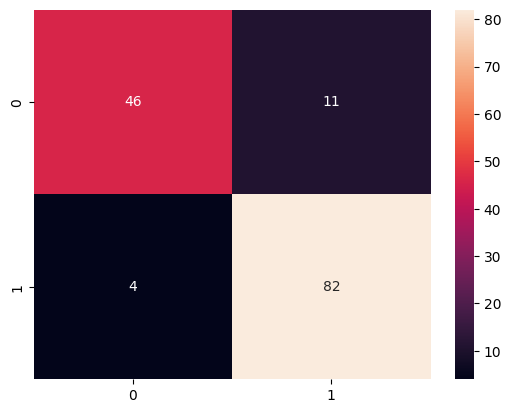

In [89]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test, predictions)
print(cm)
sns.heatmap(cm, annot= True)


In [90]:
#get accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.8951048951048951